# Arctic sea ice basemap with contour lines

The figure below was published in

Die Zeit 51, 8. Dezember 2016, Wissen: "Da stockt der Atem", von Stefan Schmitt

## References

http://onlinelibrary.wiley.com/doi/10.1111/j.1931-0846.2016.12195.x/abstract

https://www.carbonbrief.org/guest-post-piecing-together-arctic-sea-ice-history-1850

<IPython.core.display.Javascript object>


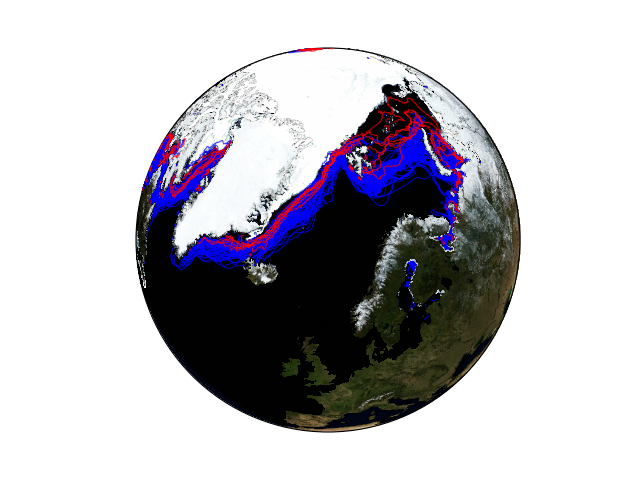

In [18]:
%matplotlib notebook

from pylab import *
import netCDF4
from mpl_toolkits.basemap import Basemap, addcyclic
import numpy.ma as ma
import pyproj

# Download AMSR2 data from www.seaice.de
# (Click on map and search through ftp-site in directory 3.125)
fn='/home/lars/Downloads/Arc_20161119_res3.125_pyres.nc'
fid=netCDF4.Dataset(fn)
sic=fid.variables['sea_ice_concentration'][0,:,:]

# Download landmask from
# https://sites.google.com/site/arctischepinguin/home/amsr2/data
fn_lm='/home/lars/sync/data/landmask/landmask3.125.png'
lm=imread(fn_lm).T>0
sic[lm]=nan # set land to missing value
sic[lat>89]=100 # fill Northpole data gap
sic=ma.masked_invalid(sic) # masked array

# Download sea ice concentration 1850-2013 from NSIDC website
# Walsh et al. (2016)
f='/home/lars/data/Seaice_1850/G10010_SIBT1850_v1.1.nc'
fid=netCDF4.Dataset(f)
lat2=fid.variables['latitude'][:]
lon2=fid.variables['longitude'][:]
Sic=array(fid.variables['seaice_conc']) # Second Sic capitalized
Sic[Sic<0]=nan # mark missing values with nan
Sic=ma.masked_invalid(Sic)
Lon,Lat=meshgrid(lon2,lat2)


# Generate lat, lon coordinate from grid definition
cs=3.125 # grid cell size 3125 meter
x0,y0,x2,y2=3750.0,5850.0,-3850.0,-5350.0 # Corner coords in km 
y=linspace(y2+cs/2,y0-cs/2,(y0-y2)/cs) 
x=linspace(x2+cs/2,x0-cs/2,(x0-x2)/cs)
X,Y=meshgrid(x,y) # create grid mesh
proj=pyproj.Proj("+init=EPSG:3413") # "NSIDC" Polar Stereographic North
lon,lat=proj(X*1000,Y*1000,inverse=True) # Calculate lat, lon from X,Y


##### Create Map #################################
close() 
# Set up basemap with nsper projection
m = Basemap(projection='nsper',lon_0=0,lat_0=70,resolution='i',\
            satellite_height=2000000) 

Xg,Yg=m(Lon,Lat)# Calculate nsper coordinates for 1850-2013 and 
xg,yg=m(lon,lat)# recent AMSR2

# Download blue marble from NASA website 
bmfile='/home/lars/sync/data/bluemarbles/world.200410.3x5400x2700.jpg'
m.warpimage(image=bmfile)


ps=range(0,101,1)
set_cmap('bone')
CS=m.contourf(xg,yg,sic,ps,cmap=cm.bone)

for i in range(164): # Loop over years
    c='b'# blue contour lines
    if i>156:  # Recent years in red
        c='r'
    sic0=Sic[i*12+10,:,:] # Select month 10 of every year
    m.contour(Xg,Yg,sic0,array([15]),colors=c,linewidth=2,alpha=0.7)
    
m.drawcoastlines(linewidth=0.1,color='k')
